In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import pardir, path
import re

In [2]:
# make mpl able to render Thai
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']

In [3]:
si_df = pd.read_json(path.join(pardir, 'si-data.json'))

### Author

In [4]:
si_df.update(si_df.author.apply(lambda x: x.replace( ' Authenticated user', '')))

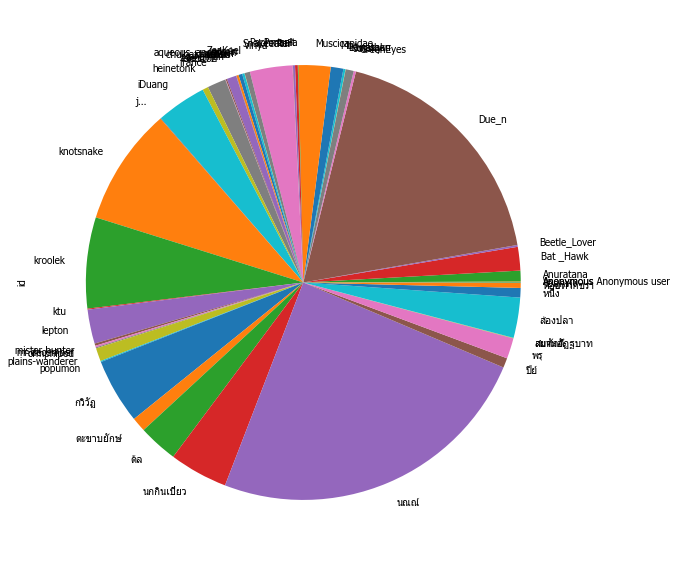

In [5]:
plt.figure(figsize=(10,10))
si_df.groupby('author').id.count().plot(kind='pie')

### Phylum

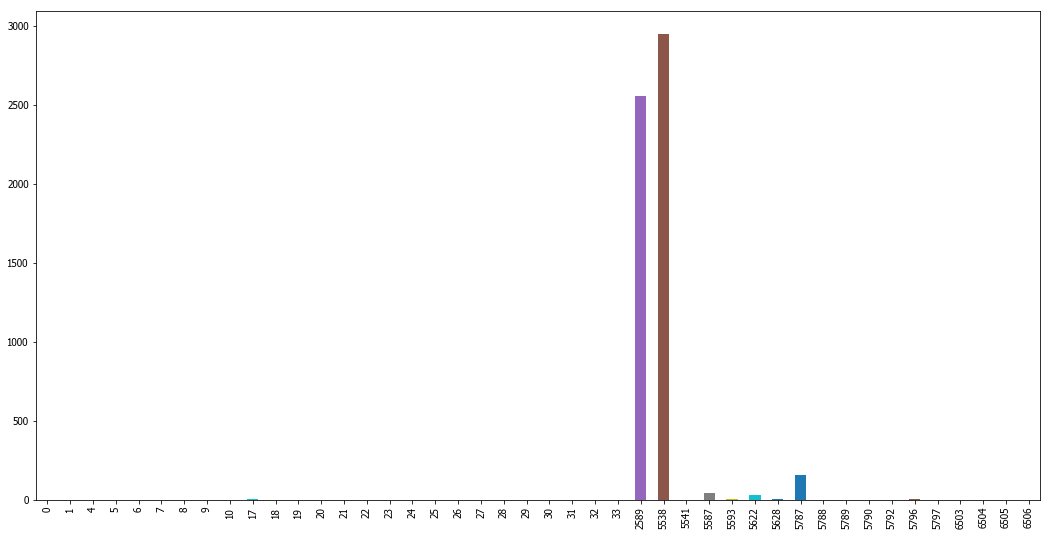

In [6]:
plt.figure(figsize=(18,9))
si_df[si_df['rank'] == 'Phylum']['num_children'].plot(kind='bar')
